In [79]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [80]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
x=data.drop(['Species'],axis=1)

In [82]:
y=data['Species']

In [83]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [84]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [87]:
ann=tf.keras.models.Sequential()

In [88]:
ann.add(tf.keras.layers.Dense(units=2,activation='relu'))

In [89]:
ann.add(tf.keras.layers.Dense(units=1,activation='softmax'))

In [90]:
ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [91]:
ann.fit(x_train,y_train,batch_size=3,epochs=100)


Epoch 1/100


c:\Python312\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(3, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2894 - loss: 0.0000e+00       
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.2197 - loss: 0.0000e+00  
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2757 - loss: 0.0000e+00     
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2812 - loss: 0.0000e+00 
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3432 - loss: 0.0000e+00 
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3400 - loss: 0.0000e+00 
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.3524 - loss: 0.0000e+00
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.2832 - loss: 0.0000e+00
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.3480 - loss: 0.0000e+00
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2606 - loss: 0.0000e+00 
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3342 - loss: 0.0000e+00
Epoc

In [92]:
y_pred=ann.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [94]:
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.43333333333333335


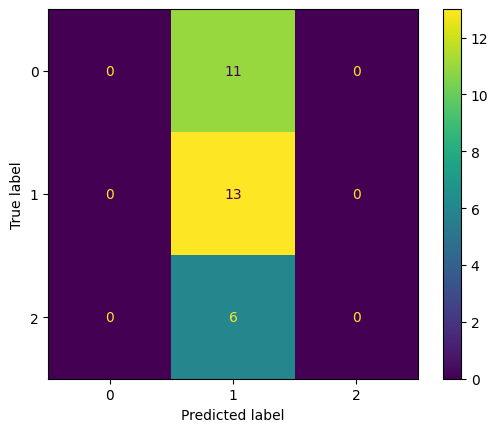

In [95]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()